In [32]:
# implementing Pocket algorithm

# I have used Half moon data set from MLA book from problem 1


#Importing data set
%matplotlib inline
import sklearn.datasets
import matplotlib.pyplot as plt
import matplotlib
import numpy as np



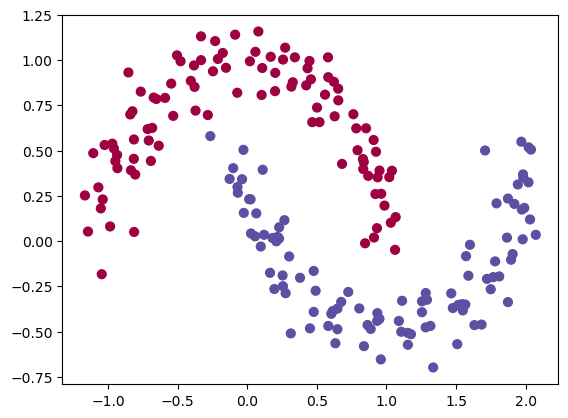

In [2]:
#matplotlib.style.use('ggplot') #makes plots look pretty

# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.1)
# X coordinates
#print('this is x',X)
#Y cordinates
#print('This is y',y)
#desplaying half moon dataset
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)


In [14]:
print(y)
y.shape

[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


(200,)

In [44]:
print(X[:,0], X[:,1])
print(y)

[0 0 1 1] [0 1 0 1]
[0 0 0 1]


[0 0 0 1]


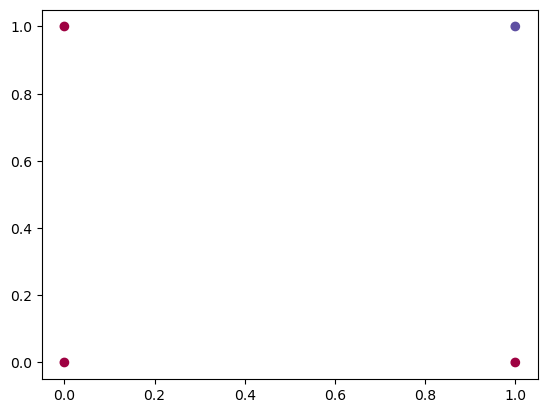

In [33]:
X=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y=np.array([0,0,0,1])
print(y)
y.shape
plt.scatter(X[:,0], X[:,1],  c=y, cmap=plt.cm.Spectral)

In [34]:
# Assigning the learning rate
learningRate = 0.01

# Adding the X0=1 in the data set 
oneVector = np.ones((X.shape[0], 1))
X_train = np.concatenate((oneVector, X), axis=1)
#
#print('this is x array:',X_train)
#print('this is class ',Y)

plotData = []

#Assigning random weights 
weights = np.random.rand(3, 1)

misClassifications = 1
minMisclassifications = 10000
#Initial iteration starts from
iteration = 0

In [47]:
len(X_train)
X_train[0].reshape(-1, X_train.shape[1])

array([[1., 0., 0.]])

In [35]:
print(X_train)

[[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]


In [36]:

# Psudocode for pocket algorithm
while (misClassifications != 0 and (iteration<1000)):
    iteration += 1
    misClassifications = 0

    for i in range(0, len(X_train)):
        currentX = X_train[i].reshape(-1, X_train.shape[1])
        currentY = y[i]
        wTx = np.dot(currentX, weights)[0][0]
        #same as PLA algorithm 
        if currentY == 1 and wTx < 0:
            misClassifications += 1
            weights = weights + learningRate * np.transpose(currentX)
        elif currentY == 0 and wTx > 0:
            misClassifications += 1
            weights = weights - learningRate * np.transpose(currentX)
    plotData.append(misClassifications)
    
    # Commrnt the following lines for the Percptron Algorithm
    #if misClassifications<minMisclassifications:
    #    minMisclassifications = misClassifications
    # if iteration%1==0:
    print("Iteration {}, Misclassifications {}".format(iteration, misClassifications))

Iteration 1, Misclassifications 3
Iteration 2, Misclassifications 2
Iteration 3, Misclassifications 2
Iteration 4, Misclassifications 1
Iteration 5, Misclassifications 1
Iteration 6, Misclassifications 1
Iteration 7, Misclassifications 1
Iteration 8, Misclassifications 1
Iteration 9, Misclassifications 1
Iteration 10, Misclassifications 1
Iteration 11, Misclassifications 1
Iteration 12, Misclassifications 1
Iteration 13, Misclassifications 1
Iteration 14, Misclassifications 1
Iteration 15, Misclassifications 1
Iteration 16, Misclassifications 1
Iteration 17, Misclassifications 1
Iteration 18, Misclassifications 1
Iteration 19, Misclassifications 1
Iteration 20, Misclassifications 1
Iteration 21, Misclassifications 1
Iteration 22, Misclassifications 1
Iteration 23, Misclassifications 1
Iteration 24, Misclassifications 1
Iteration 25, Misclassifications 1
Iteration 26, Misclassifications 1
Iteration 27, Misclassifications 1
Iteration 28, Misclassifications 1
Iteration 29, Misclassificati

In [37]:
print(weights)

[[-0.33106873]
 [ 0.06023298]
 [ 0.3191828 ]]


In [29]:
0.00906266/0.32500555

0.027884631508600394

In [38]:
# Checking the accuracy of the algorithm

# Here Min missclassification is the lowest error points found during linear classification
print ("Minimum Misclassifications : ",minMisclassifications)
print('Updates weight is: ',weights.transpose())
print ("Best Case Accuracy of Pocket Learning Algorithm is: ",(((X_train.shape[0]-minMisclassifications)/X_train.shape[0])*100),"%")

Minimum Misclassifications :  0
Updates weight is:  [[-0.33106873  0.06023298  0.3191828 ]]
Best Case Accuracy of Pocket Learning Algorithm is:  100.0 %


[0 0 0 1]


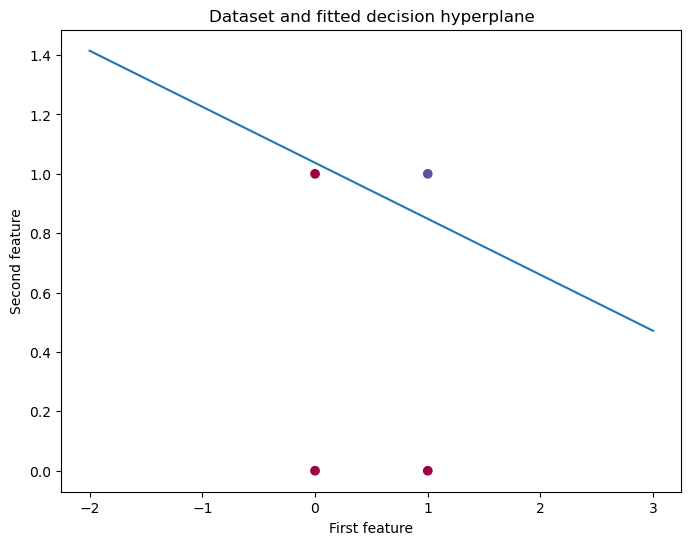

In [43]:
def plot_hyperplane(X, Y, weights):
    """
    Plots the dataset and the estimated decision hyperplane
    """
    print(y)
    bias = weights[0]
    slope = - weights[1]/weights[2]
    intercept = - bias/weights[2]
    x_hyperplane = np.linspace(-2,3,10)
    y_hyperplane = slope * x_hyperplane + intercept
    plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Dataset and fitted decision hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()
plot_hyperplane(X, y, weights )    